In [30]:
from matplotlib import pyplot as plt
import cv2 

In [12]:
image = cv2.imread('C:\\Users\\Administrator\\Documents\\GitHub\\Code\\2019\\Udemy\\Computer Vision Using Open CV\\Master OpenCV\\images\\input.jpg')

cv2.imshow('Hello World', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Simply use 'imwrite' specificing the file name and the image to be saved
cv2.imwrite('output.jpg', image)
cv2.imwrite('output.png', image)

True

In [13]:
# We use cvtColor, to convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grey Image',gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# BGR Values for the first 0,0 pixel
B, G,R=image[10,50]
print(B,G,R)
print(image.shape)

print(gray_image[10,50])
print(gray_image.shape)



13 19 32
(830, 1245, 3)
22
(830, 1245)


In [17]:
#image = cv2.imread('./images/input.jpg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

cv2.imshow('HSV image', hsv_image) ## Infact HSV is very useful in color filtering.
cv2.imshow('Hue channel', hsv_image[:, :, 0])
cv2.imshow('Saturation channel', hsv_image[:, :, 1])
cv2.imshow('Value channel', hsv_image[:, :, 2])

cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
#image = cv2.imread('./images/input.jpg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

print(B.shape)
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Let's re-make the original image, 
merged = cv2.merge([B, G, R]) 
cv2.imshow("Merged", merged) 

# Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
cv2.imshow("Merged with Blue Amplified", merged) 

cv2.waitKey(0)
cv2.destroyAllWindows()

(830, 1245)


In [24]:
import cv2
import numpy as np

B, G, R = cv2.split(image)

# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")

cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
## Calculating Histograms

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

In [27]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

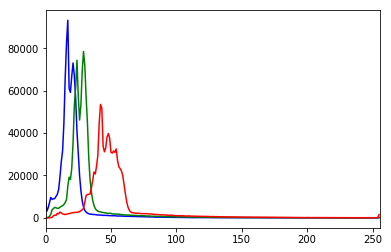

In [48]:
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

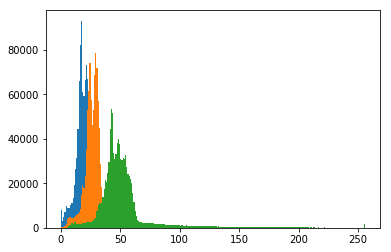

In [45]:
#plt.hist(image.ravel(), 256, [0, 256])
B,G,R=cv2.split(image)
plt.hist(B.ravel(),256,[0,256])
plt.hist(G.ravel(),256,[0,256])
plt.hist(R.ravel(),256,[0,256])
plt.show()

In [50]:
import cv2
import numpy as np

# Create a black image
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white?
image_bw = np.zeros((512,512), np.uint8)

cv2.imshow("Black Rectangle (Color)", image)
cv2.imshow("Black Rectangle (B&W)", image_bw)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Let's draw a line over our black sqare

cv2.line(image, starting cordinates, ending cordinates, color, thickness)

In [58]:
# Draw a diagonal blue line of thickness of 5 pixels
image = np.zeros((512,512,3), np.uint8)
cv2.line(image, (0,0), (410,511), (255,127,0), 5)
cv2.imshow("Blue Line", image)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Let's now draw a rectangle

cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)

In [59]:
# Draw a Rectangle in
image = np.zeros((512,512,3), np.uint8)

cv2.rectangle(image, (100,100), (300,250), (127,50,127), -1)
cv2.imshow("Rectangle", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### How about cirlcles?

cv2.cirlce(image, center, radius, color, fill)

In [60]:
image = np.zeros((512,512,3), np.uint8)

cv2.circle(image, (350, 350), 100, (15,75,50), -1) 
cv2.imshow("Circle", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## And polygons?

In [61]:
image = np.zeros((512,512,3), np.uint8)

# Let's define four points
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)

# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))

cv2.polylines(image, [pts], True, (0,0,255), 3)
cv2.imshow("Polygon", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Let's even add text with cv2.putText

cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)

- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX 
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

In [62]:
image = np.zeros((512,512,3), np.uint8)

cv2.putText(image, 'Hello World!', (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
cv2.imshow("Hello World!", image)
cv2.waitKey(0)
cv2.destroyAllWindows()